In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
dataset_path = "data/Housing.csv"
df = pd.read_csv(dataset_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Xử lý dữ liệu categorical

In [5]:
categorical_cols = df.select_dtypes(include=["object"]).columns.to_list()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [11]:
categorical_cols = df.select_dtypes(include=["object"]).columns.to_list()

ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
print(encoded_categorical_cols.shape)
encoded_categorical_cols[:5]

(545, 7)


array([[1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1., 0.],
       [1., 1., 1., 0., 1., 0., 0.]])

In [12]:
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols, columns=categorical_cols
)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

encoded_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0


## Chuẩn hóa bộ dữ liệu

In [13]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)
print(dataset_arr.shape)
dataset_arr[:5]

(545, 13)


array([[ 4.56636513,  1.04672629,  1.40341936,  1.42181174,  1.37821692,
         1.51769249,  0.40562287, -0.46531479, -0.73453933, -0.2192645 ,
         1.4726183 ,  1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936,  5.40580863,  2.53202371,
         2.67940935,  0.40562287, -0.46531479, -0.73453933, -0.2192645 ,
         1.4726183 , -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831,  1.42181174,  0.22441013,
         1.51769249,  0.40562287, -0.46531479,  1.3613975 , -0.2192645 ,
        -0.67906259,  1.80494113, -0.09166185],
       [ 3.98575468,  1.08362412,  1.40341936,  1.42181174,  0.22441013,
         2.67940935,  0.40562287, -0.46531479,  1.3613975 , -0.2192645 ,
         1.4726183 ,  1.80494113, -1.40628573],
       [ 3.55497918,  1.04672629,  1.40341936, -0.57018671,  0.22441013,
         1.51769249,  0.40562287,  2.14908276,  1.3613975 , -0.2192645 ,
         1.4726183 , -0.55403469, -1.40628573]])

## Chia tập dữ liệu train, val

In [14]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [15]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=is_shuffle
)

In [16]:
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of val samples: {X_val.shape[0]}")

Number of training samples: 381
Number of val samples: 164


## Huấn luyện mô hình

In [17]:
regressor = RandomForestRegressor(random_state=random_state)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

## Đánh giá mô hình

In [18]:
y_pred = regressor.predict(X_val)

In [19]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print("Evaluation results on validation set:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Evaluation results on validation set:
Mean Absolute Error: 0.46093873321571177
Mean Squared Error: 0.37944418523089524


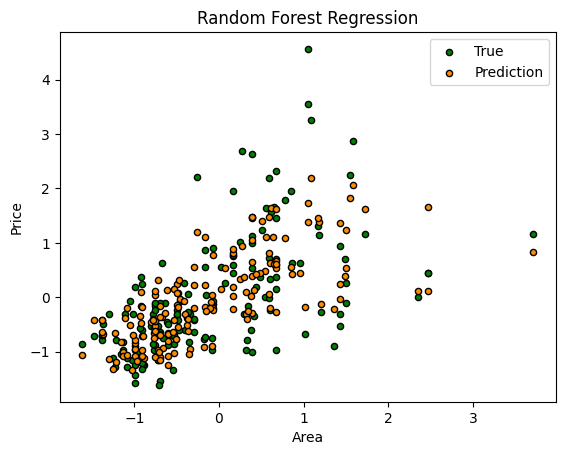

In [20]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(
    X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction"
)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [21]:
regressor = GradientBoostingRegressor(random_state=random_state)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [22]:
y_pred = regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print("Evaluation results on validation set:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Evaluation results on validation set:
Mean Absolute Error: 0.4516626127750995
Mean Squared Error: 0.39610445936979427


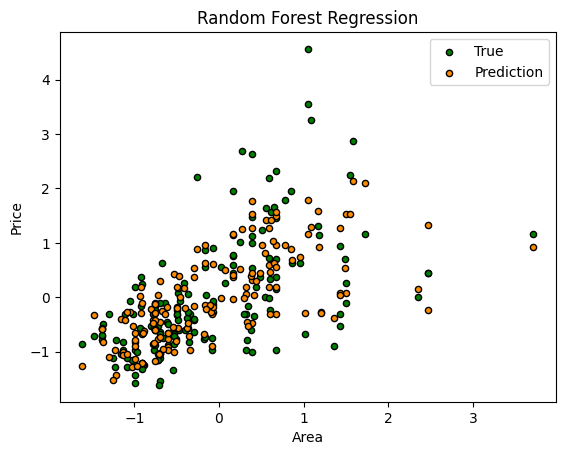

In [23]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(
    X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction"
)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

## Small data testing

In [7]:
data = [
    [2, 4],
    [1, 3],
    [3, 5],
    [2, 6],
]
data = np.array(data)

In [17]:
regressor = RandomForestRegressor(n_estimators=2, max_depth=1)
regressor.fit(data[:, :1], data[:, -1])

RandomForestRegressor(max_depth=1, n_estimators=2)

In [18]:
regressor.predict([[2]])

array([4.5])